In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import mrmr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, plot_precision_recall_curve
import pymrmr
from scipy.stats import kruskal, mannwhitneyu
from boruta import BorutaPy
import umap

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

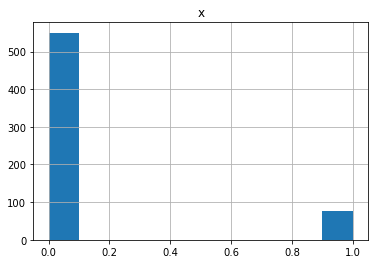

In [6]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [12]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [13]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
            
    return data

# Normalize and filter datasets

In [14]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

In [15]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
    
    return dict_filtered_nornalize

In [16]:
filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)

In [17]:
#TO DO: su ogni dataset, genero i vari holdout e sui dati di training faccio
#feature selection e traino usando RandomForest
#usando 10 multiple holdout 
#misura di performance AUPRC, auc interne e poi media fuori 

#Feature seletion using multivariate (mrmr, maximum relevant minimum redundancy e boruta)
#mrmr piu' e' basso piu' la feature non ci interessa, piu' e' alto piu e' informativa

In [18]:
#UMAP 

In [19]:
#baseline AUPRC
len(label)/label[label['x'] == 1].count()/100

x    0.081429
dtype: float64

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [20]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [21]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

In [22]:
univariate_features_selection(filtered_normalize_data['proteins'], label, mannwhitneyu, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

In [23]:
univariate_features_selection(filtered_normalize_data['proteins'], label, kruskal, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

# Multivariate feature selection, mrmr and Boruta

In [24]:
def dataset_mrmr(dataset, n_feature):
    return dataset[mRMR(dataset, 'MIQ', n_feature)]

In [25]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

In [26]:
#kept, discarded = execute_boruta_feature_selection(filtered_normalize_data['cnv'], label, 3)

In [27]:
#filtered_normalize_data['proteins'][kept]

# Train

In [28]:
"""Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. 
Ironically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible."""

'Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. \nIronically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible.'

In [29]:
#baseline AUPRC
#positivi / tot 
len(label)/label[label['x'] == 1].count()/100

x    0.081429
dtype: float64

In [30]:
def train_model(dataset, label, num_extenal_fold, type_feature_selection, min_pValue:None):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: pd.DataFrame,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu'.
    """
    
    
    aucs =[]
    tests = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in external_fold.split(X_numpy, label):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        #feature selection
        if type_feature_selection == 'kruskal':
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, min_pValue)
        elif type_feature_selection == 'mannwhitneyu':
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, min_pValue)
        elif type_feature_selection == "mrmr":
            selected_features = mRMR(df_X_train, 'MIQ', 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        else:
            return "Invalid type of feature selection"
        
        if len(selected_features) == 0:
            return 'features selection is empty'
        
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]

        #clf = GridSearchCV(estimator=RandomForestClassifier(),
        #                   scoring=scoring,
        #                   param_grid=model_selection_grid, 
        #                   cv=2, 
        #                   n_jobs=-1)
        #clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        #print('auc: {:.3f} using params {}:'.format(auc, clf.best_params_))
        
        # Create classifier using logistic regression
        classifier = RandomForestClassifier(random_state=1)
        classifier.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = classifier.predict_proba(X_test_selected_feature)[:, 1]
        
        #calculate precision and recall
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)

        plot_precision_recall_curve(classifier, X_test_selected_feature, y_test_fold)
        
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        aucs.append(auc_precision_recall)
    
    return np.mean(aucs)

0.17243107954748677

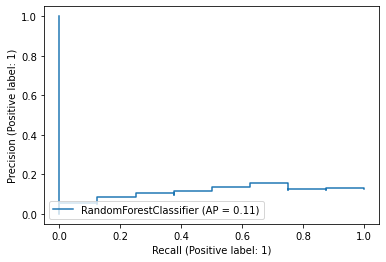

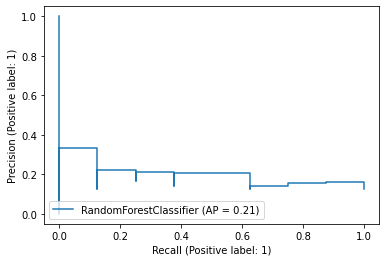

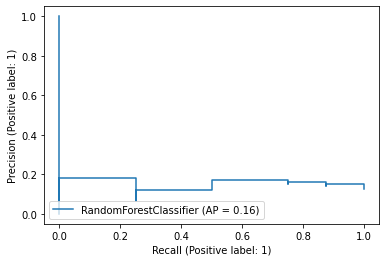

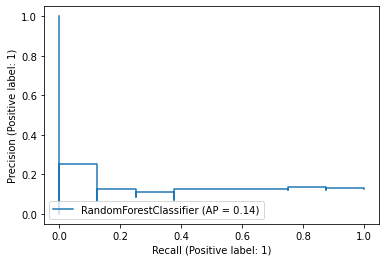

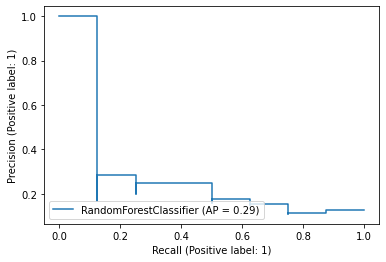

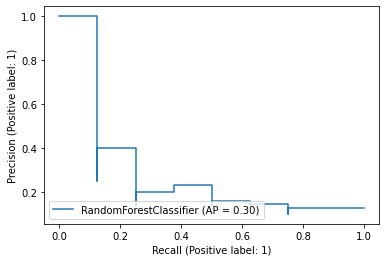

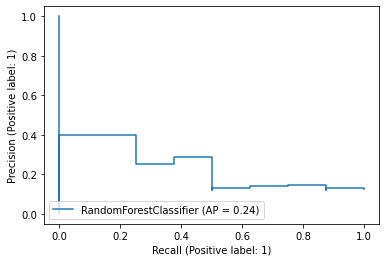

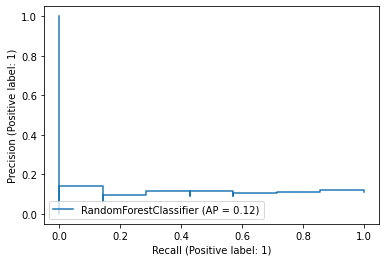

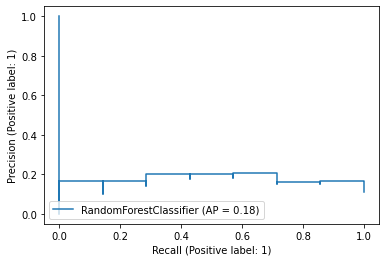

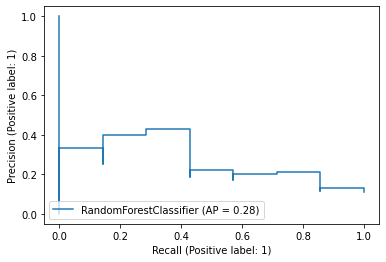

In [31]:
train_model(filtered_normalize_data['proteins'], label, 10, 'kruskal', 0.05)

In [32]:
#trans = umap.UMAP(n_neighbors=5, n_components=10, random_state=42).fit(filtered_normalize_data['miRNA'].values)

#trans.embedding_

In [33]:
def trainAllDataset(listaDataset, 
                    label, 
                    num_extenal_fold, 
                    mrmrK, 
                    scaler, 
                    minimumVariance, 
                    model_selection_grid,
                    scoring):
    roc_aucList =[]
    for dataset in listaDataset:
        roc_aucList.append(train_model(dataset, label, num_extenal_fold, mrmrK, scaler, minimumVariance, 
                          model_selection_grid,
                          scoring ))
    return np.mean(roc_aucList)

In [34]:
model_selection_grid_DT = [
    {},
    #{'criterion': ['gini', 'entropy'],
     #'max_leaf_nodes': [None, 2, 5, 10, 50, 100],
      #                  'max_features': [None, 'sqrt', 'log2'],
       #                 'max_depth': [None, 2, 5, 10]}
]

In [35]:
def addResultJsonFile(result_dict, file_name, dataset, type_feature_selection):
    
    if type_feature_selection not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if type_feature_selection in saved_dict:
                    print('Già presente')
                    result_dict[type_feature_selection] = saved_dict[type_feature_selection]
                else:
                    print('Inizio a calcolare')
                    result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [36]:
proteins_dict = {}
cnv_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cnv_dict, miRNA_dict, mRNA_dict]
names_file = ['protein.json', 'cnv.json', 'miRNA.json', 'mRNA.json']
dataset_list = [filtered_normalize_data['proteins'], filtered_normalize_data['cnv'], 
                filtered_normalize_data['miRNA'], filtered_normalize_data['mRNA']]
type_feature_selection = ['kruskal', 'mannwhitneyu', 'boruta', 'mrmr']

In [37]:
def create_all_json(datasets_dict, columns_name, names_file, dataset_list):
    for (dataset_dict, name_file, dataset) in zip(datasets_dict, names_file, dataset_list):
        print(f'Start {name_file}')
        for type_feature_selection in columns_name:
            print(f'Start {type_feature_selection}')
            addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)

Inizio a calcolare
Inizio a calcolare


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 170 	 hsa-mir-187 	 0.019
2 	 3 	 hsa-let-7b 	 0.019
3 	 2 	 hsa-let-7a-3 	 0.019
4 	 103 	 hsa-mir-1294 	 0.014
5 	 417 	 hsa-mir-3656 	 0.011
6 	 482 	 hsa-mir-3925 	 0.000
7 	 328 	 hsa-mir-3179-2 	 0.000
8 	 79 	 hsa-mir-1273c 	 0.000
9 	 724 	 hsa-mir-718 	 0.000
10 	 336 	 hsa-mir-3184 	 0.000
11 	 752 	 hsa-mir-922 	 0.000
12 	 11 	 hsa-mir-1-1 	 0.000
13 	 673 	 hsa-mir-617 	 0.000
14 	 519 	 hsa-mir-4315-2 	 0.000
15 	 761 	 hsa-m

52 	 655 	 hsa-mir-596 	 0.040
53 	 470 	 hsa-mir-3912 	 0.041
54 	 705 	 hsa-mir-657 	 0.041
55 	 628 	 hsa-mir-554 	 0.041
56 	 355 	 hsa-mir-3202-2 	 0.041
57 	 67 	 hsa-mir-1260 	 0.041
58 	 562 	 hsa-mir-510 	 0.040
59 	 616 	 hsa-mir-548u 	 0.040
60 	 195 	 hsa-mir-198 	 0.040
61 	 649 	 hsa-mir-586 	 0.036
62 	 462 	 hsa-mir-380 	 0.036
63 	 461 	 hsa-mir-379 	 0.036
64 	 511 	 hsa-mir-4279 	 0.036
65 	 696 	 hsa-mir-645 	 0.036
66 	 57 	 hsa-mir-1253 	 0.036
67 	 531 	 hsa-mir-450b 	 0.036
68 	 541 	 hsa-mir-491 	 0.037
69 	 496 	 hsa-mir-3942 	 0.037
70 	 510 	 hsa-mir-4265 	 0.037
71 	 402 	 hsa-mir-3621 	 0.037
72 	 465 	 hsa-mir-383 	 0.037
73 	 439 	 hsa-mir-3688 	 0.037
74 	 420 	 hsa-mir-3659 	 0.037
75 	 419 	 hsa-mir-3658 	 0.037
76 	 136 	 hsa-mir-1469 	 0.037
77 	 47 	 hsa-mir-1244-1 	 0.037
78 	 95 	 hsa-mir-1289-1 	 0.038
79 	 108 	 hsa-mir-1303 	 0.038
80 	 494 	 hsa-mir-3940 	 0.037
81 	 435 	 hsa-mir-3683 	 0.037
82 	 693 	 hsa-mir-642b 	 0.037
83 	 304 	 hsa-mi

92 	 509 	 hsa-mir-4254 	 0.038
93 	 92 	 hsa-mir-1286 	 0.038
94 	 260 	 hsa-mir-302d 	 0.038
95 	 730 	 hsa-mir-765 	 0.038
96 	 628 	 hsa-mir-554 	 0.038
97 	 662 	 hsa-mir-604 	 0.038
98 	 437 	 hsa-mir-3685 	 0.038
99 	 250 	 hsa-mir-298 	 0.038
100 	 734 	 hsa-mir-770 	 0.038


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 2 	 hsa-let-7a-3 	 0.019
2 	 170 	 hsa-mir-187 	 0.019
3 	 3 	 hsa-let-7b 	 0.019
4 	 103 	 hsa-mir-1294 	 0.015
5 	 417 	 hsa-mir-3656 	 0.012
6 	 482 	 hsa-mir-3925 	 0.000
7 	 724 	 hsa-mir-718 	

44 	 614 	 hsa-mir-548s 	 0.058
45 	 406 	 hsa-mir-3646 	 0.058
46 	 522 	 hsa-mir-4322 	 0.057
47 	 328 	 hsa-mir-3179-2 	 0.052
48 	 445 	 hsa-mir-3692 	 0.051
49 	 310 	 hsa-mir-3160-2 	 0.041
50 	 675 	 hsa-mir-621 	 0.041
51 	 655 	 hsa-mir-596 	 0.041
52 	 108 	 hsa-mir-1303 	 0.042
53 	 355 	 hsa-mir-3202-2 	 0.042
54 	 705 	 hsa-mir-657 	 0.041
55 	 331 	 hsa-mir-3180-2 	 0.041
56 	 628 	 hsa-mir-554 	 0.042
57 	 297 	 hsa-mir-3147 	 0.042
58 	 635 	 hsa-mir-567 	 0.039
59 	 304 	 hsa-mir-3154 	 0.038
60 	 57 	 hsa-mir-1253 	 0.038
61 	 649 	 hsa-mir-586 	 0.038
62 	 617 	 hsa-mir-548w 	 0.038
63 	 468 	 hsa-mir-3910-2 	 0.036
64 	 461 	 hsa-mir-379 	 0.036
65 	 462 	 hsa-mir-380 	 0.036
66 	 465 	 hsa-mir-383 	 0.036
67 	 402 	 hsa-mir-3621 	 0.036
68 	 397 	 hsa-mir-3617 	 0.037
69 	 389 	 hsa-mir-3609 	 0.037
70 	 696 	 hsa-mir-645 	 0.037
71 	 357 	 hsa-mir-320b-1 	 0.037
72 	 47 	 hsa-mir-1244-1 	 0.037
73 	 392 	 hsa-mir-3611 	 0.037
74 	 712 	 hsa-mir-663b 	 0.037
75 	 3

84 	 666 	 hsa-mir-609 	 0.037
85 	 716 	 hsa-mir-670 	 0.038
86 	 304 	 hsa-mir-3154 	 0.038
87 	 195 	 hsa-mir-198 	 0.038
88 	 712 	 hsa-mir-663b 	 0.038
89 	 437 	 hsa-mir-3685 	 0.038
90 	 755 	 hsa-mir-92b 	 0.038
91 	 722 	 hsa-mir-7-3 	 0.038
92 	 723 	 hsa-mir-708 	 0.038
93 	 705 	 hsa-mir-657 	 0.038
94 	 730 	 hsa-mir-765 	 0.038
95 	 735 	 hsa-mir-873 	 0.038
96 	 572 	 hsa-mir-514b 	 0.038
97 	 568 	 hsa-mir-513c 	 0.038
98 	 548 	 hsa-mir-498 	 0.038
99 	 250 	 hsa-mir-298 	 0.038
100 	 689 	 hsa-mir-638 	 0.038


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


***

36 	 519 	 hsa-mir-4315-2 	 0.055
37 	 328 	 hsa-mir-3179-2 	 0.055
38 	 259 	 hsa-mir-302b 	 0.055
39 	 572 	 hsa-mir-514b 	 0.054
40 	 435 	 hsa-mir-3683 	 0.055
41 	 406 	 hsa-mir-3646 	 0.055
42 	 387 	 hsa-mir-3606 	 0.056
43 	 650 	 hsa-mir-587 	 0.056
44 	 522 	 hsa-mir-4322 	 0.054
45 	 675 	 hsa-mir-621 	 0.050
46 	 445 	 hsa-mir-3692 	 0.047
47 	 274 	 hsa-mir-3121 	 0.046
48 	 260 	 hsa-mir-302d 	 0.045
49 	 248 	 hsa-mir-2861 	 0.045
50 	 440 	 hsa-mir-3689a 	 0.042
51 	 393 	 hsa-mir-3612 	 0.042
52 	 297 	 hsa-mir-3147 	 0.041
53 	 470 	 hsa-mir-3912 	 0.041
54 	 355 	 hsa-mir-3202-2 	 0.041
55 	 655 	 hsa-mir-596 	 0.041
56 	 628 	 hsa-mir-554 	 0.041
57 	 705 	 hsa-mir-657 	 0.041
58 	 67 	 hsa-mir-1260 	 0.040
59 	 616 	 hsa-mir-548u 	 0.040
60 	 195 	 hsa-mir-198 	 0.040
61 	 57 	 hsa-mir-1253 	 0.040
62 	 617 	 hsa-mir-548w 	 0.039
63 	 649 	 hsa-mir-586 	 0.038
64 	 696 	 hsa-mir-645 	 0.036
65 	 755 	 hsa-mir-92b 	 0.036
66 	 310 	 hsa-mir-3160-2 	 0.036
67 	 478 	

75 	 537 	 hsa-mir-486 	 0.000
76 	 541 	 hsa-mir-491 	 0.000
77 	 540 	 hsa-mir-489 	 0.000
78 	 539 	 hsa-mir-487b 	 0.000
79 	 543 	 hsa-mir-493 	 0.000
80 	 544 	 hsa-mir-494 	 0.000
81 	 536 	 hsa-mir-484 	 0.000
82 	 535 	 hsa-mir-466 	 0.000
83 	 534 	 hsa-mir-455 	 0.000
84 	 542 	 hsa-mir-492 	 0.000
85 	 533 	 hsa-mir-454 	 0.000
86 	 550 	 hsa-mir-500b 	 0.000
87 	 549 	 hsa-mir-500a 	 0.000
88 	 553 	 hsa-mir-503 	 0.000
89 	 552 	 hsa-mir-502 	 0.000
90 	 551 	 hsa-mir-501 	 0.000
91 	 554 	 hsa-mir-504 	 0.000
92 	 545 	 hsa-mir-495 	 0.000
93 	 548 	 hsa-mir-498 	 0.000
94 	 547 	 hsa-mir-497 	 0.000
95 	 546 	 hsa-mir-496 	 0.000
96 	 486 	 hsa-mir-3928 	 0.000
97 	 579 	 hsa-mir-519b 	 0.000
98 	 484 	 hsa-mir-3926-2 	 0.000
99 	 418 	 hsa-mir-3657 	 0.000
100 	 417 	 hsa-mir-3656 	 0.000


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "F

ValueError: All numbers are identical in kruskal

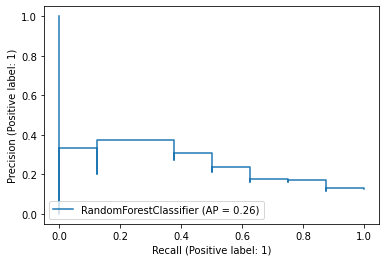

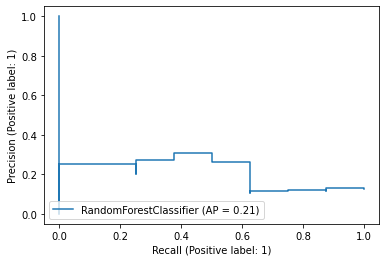

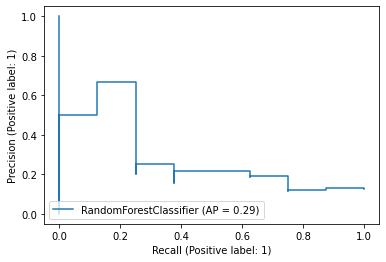

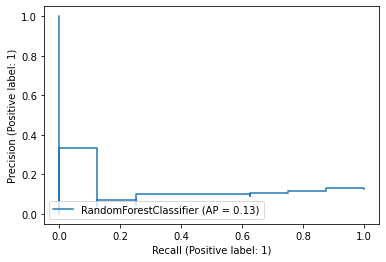

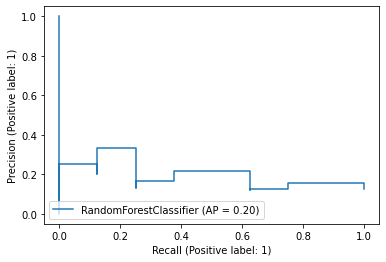

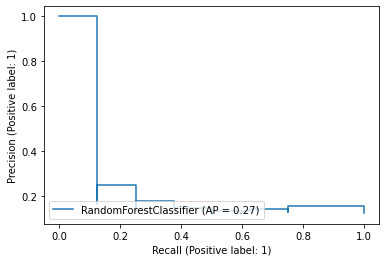

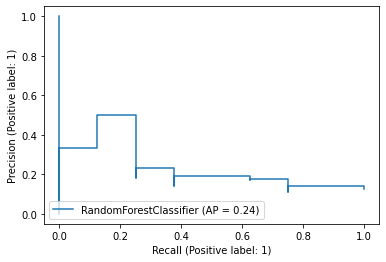

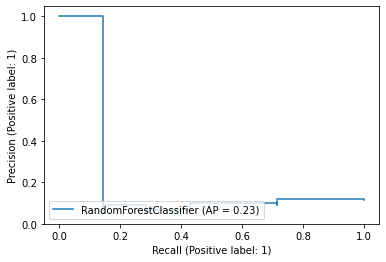

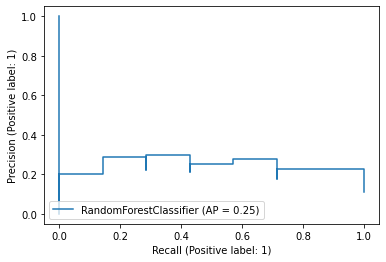

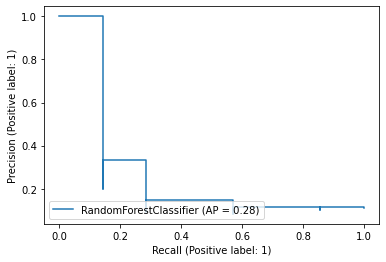

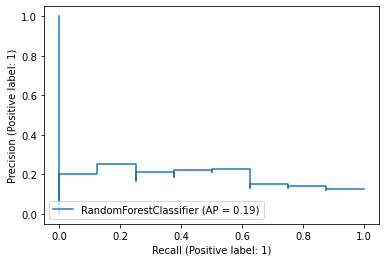

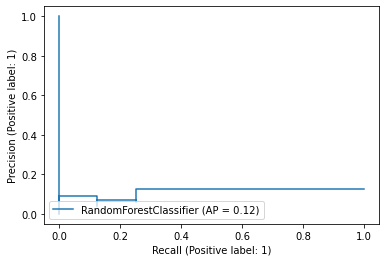

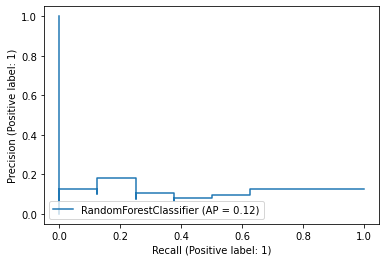

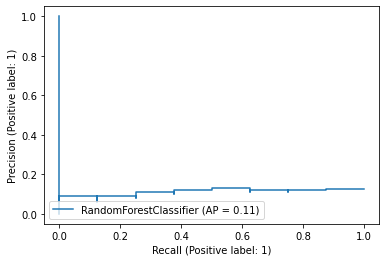

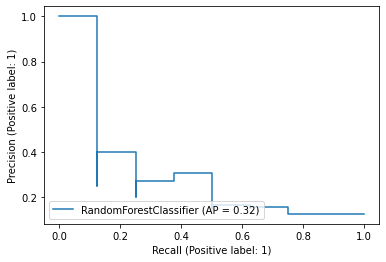

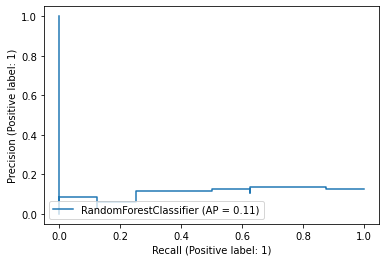

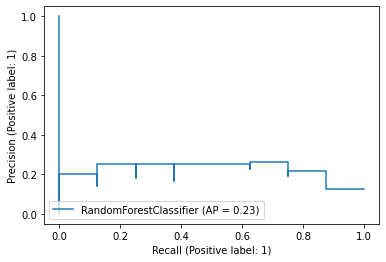

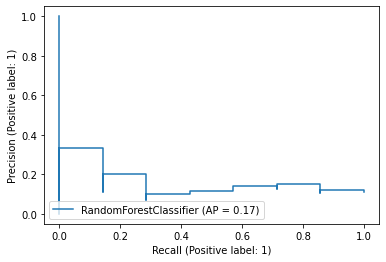

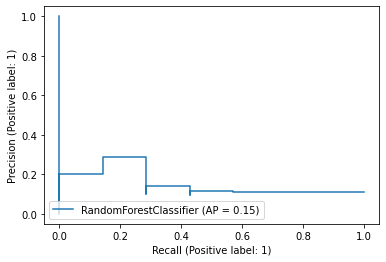

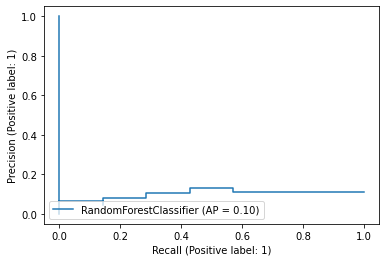

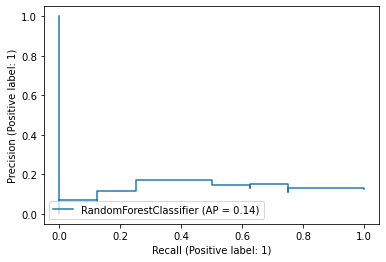

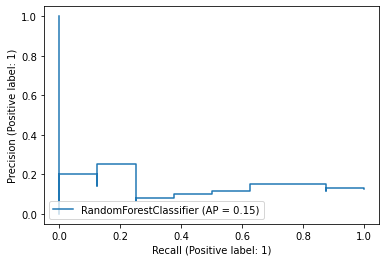

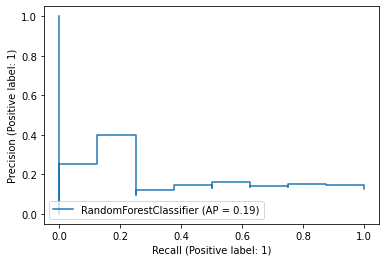

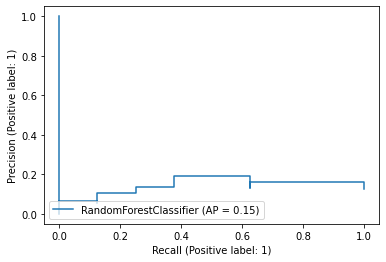

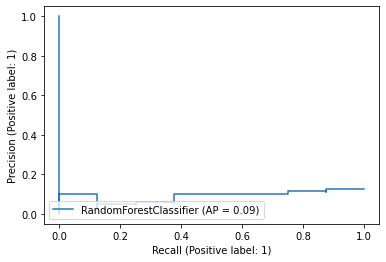

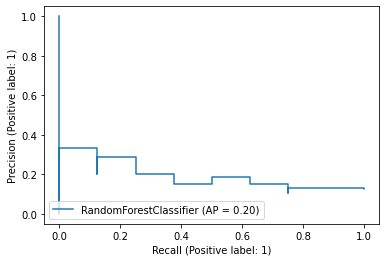

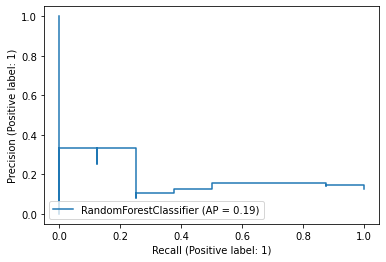

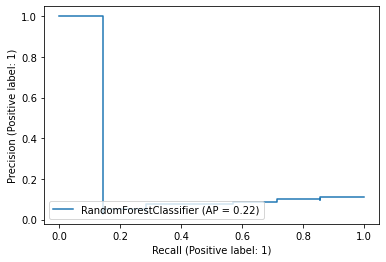

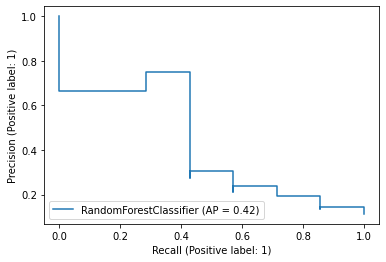

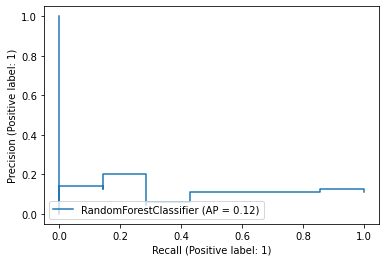

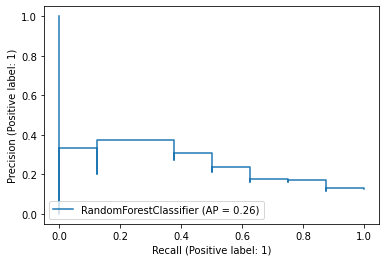

In [38]:
addResultJsonFile(miRNA_dict, 'miRNA.json', filtered_normalize_data['miRNA'], 'mannwhitneyu')
addResultJsonFile(miRNA_dict, 'miRNA.json', filtered_normalize_data['miRNA'], 'boruta')
addResultJsonFile(miRNA_dict, 'miRNA.json', filtered_normalize_data['miRNA'], 'mrmr')
addResultJsonFile(miRNA_dict, 'miRNA.json', filtered_normalize_data['miRNA'], 'kruskal')

In [ ]:
#for type_selection in type_feature_selection:
#    if type_selection != 'kruskal'    if type_selection != 'kruskal'#:
#        addResultJsonFile(miRNA_dict, 'miRNA.json', filtered_normalize_data['miRNA'], type_selection)

In [ ]:
#create_all_json(datasets_dict, type_feature_selection, names_file, dataset_list)

In [ ]:
def stampa(string):
    print(string)
    
stampa('ciao')